In [2]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
weights = [.85,.15]
X, y = make_classification(n_samples=500,
                           n_features=2, 
                           n_clusters_per_class=1, 
                           n_classes=2, 
                           weights=weights,
                           n_informative=2, 
                           class_sep=2,
                           n_redundant=0)

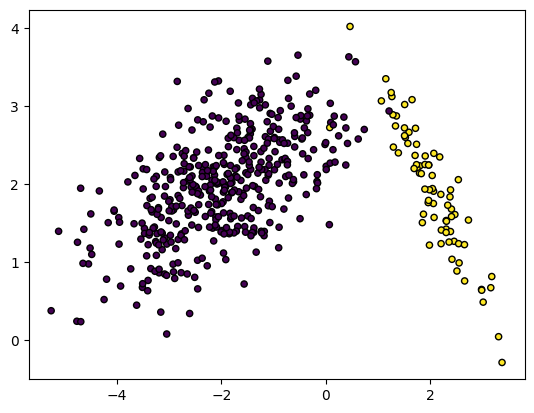

In [77]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=20, edgecolor="k");

In [78]:
train_size = int(0.8*len(X)) # 80% train , 20% test 
Xtr, Xtest = X[:train_size], X[train_size:]
Ytr, Ytest = y[:train_size], y[train_size:]

In [79]:
Xtr.shape, Ytr.shape

((400, 2), (400,))

In [80]:
# P(C=1|x1>0.8) posterior
# P(C=1) * P(x1>0.8|C=1) / P(x1>0.8)

In [83]:
# Ytr (400,30,10) == 1 ? elementwise operation 
sum(Ytr == 1)

60

In [84]:
# prior probability P(y=1)
py_1 = sum(Ytr == 1)/train_size
py_1

0.15

In [101]:
# evidence p(x1>0) = ??? 
threshold = 0
px_1 = sum(Xtr[:, 0]>threshold) / train_size
px_1 

0.1825

In [102]:
# p(x1<0,y=1)
px1_and_y1 = sum(np.logical_and(Xtr[:, 0]>threshold , Ytr == 1)) / train_size
px1_and_y1

0.15

In [103]:
# class likelihood
# p(x1>0.8| y=1)  = > p(x1>0.8,y=1) / p(y=1)
px1_and_y1 = sum(np.logical_and(Xtr[:, 0]>threshold , Ytr == 1)) / train_size / py_1
px1_and_y1

1.0

In [104]:
p_y1_given_x1 = (px1_and_y1*py_1)/ px_1

In [105]:
# posterior         p_y1_given_x1 = (px1_and_y1*py_1)/ px_1
p_y1_given_x1 , (1-p_y1_given_x1)

(0.821917808219178, 0.17808219178082196)

In [106]:
## P(y=0|x1<0) =??
prior = sum(Ytr == 0)/train_size
prior

0.85

In [107]:
# class likelihood
px1_and_y1 = sum(np.logical_and(Xtr[:, 0]>threshold , Ytr == 0)) / train_size / prior
px1_and_y1

0.03823529411764706

In [108]:
# posterior
posterior = (px1_and_y1*prior)/ px_1
posterior

0.17808219178082194

In [ ]:
# lift x0 < 1
x_threshold = 0
class_index = 1
px_and_y = sum(np.logical_and(Xtr[:,0]<x_threshold,Ytr == class_index)) / train_size
px = sum(Xtr[:,0]<x_threshold) / train_size
py = sum(Ytr == class_index) / train_size
lift = px_and_y / (px * py)

print(f"{px=}, {py=}, {px_and_y=}, {lift=}")

In [ ]:
sum(np.logical_and(Xtr[:,0]<1,Ytr == 1))